In [1]:
import pandas as pd
import numpy as np
import pathlib
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping


In [2]:
df=pd.read_csv("../Resources/Data/movies.csv")
# df["like_count%"]=df["like_count"]/df["view_count"]
# df["comment_count%"]=df["comment_count"]/df["view_count"]
df=df.replace([np.inf, -np.inf], np.nan)
df=df[df["gross"]!=0]
df=df[df["comment_count"]!=0]
df=df[df["like_count"]!=0]
df=df[df["view_count"]!=0]
df.isnull().sum(axis = 0)
df.tail()

,movie,budge,gross,comment_count,view_count,like_count,year
546,13 Hours: The Secret Soldiers of Benghazi,50000000.0,69411370.0,3727,6394274,14997,2016.0
547,The Lady in the Van,6000000.0,42320503.0,448,1719140,6604,2016.0
548,Ride Along 2,40000000.0,124827316.0,2579,14863533,48871,2016.0
550,The Masked Saint,3500000.0,182695.0,8,49350,139,2016.0
551,The Forest,10000000.0,40749230.0,2644,6716059,20913,2016.0


In [3]:
dataset=df.copy()
dataset.head()
dataset.head()
dataset["profit"]=dataset["gross"]-dataset["budge"]
df.head()
# X=dataset.iloc[:,[1,3,4,5]]
def posneg(x):
    if x>=0:
        return 1
    else:
        return 0
# y=dataset.iloc[:,[2]]
dataset["profit"]=dataset["profit"].apply(posneg)  


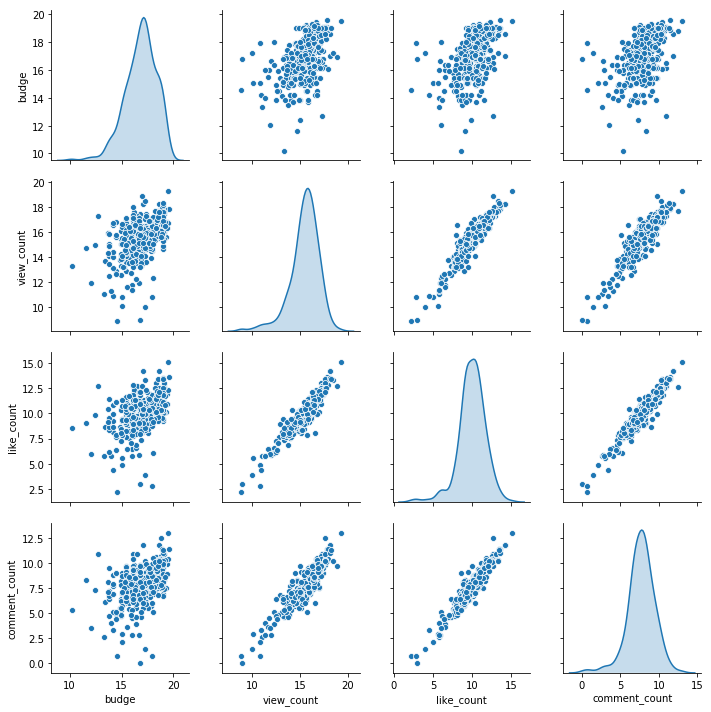

In [4]:
X=dataset.iloc[:,[1,3,4,5]]
# X=dataset.iloc[:,[1,3,4,5]]
X=np.log(X)
# X["like_count%"]=df["like_count"]/df["view_count"]
# X["comment_count%"]=df["comment_count"]/df["view_count"]
y=dataset.iloc[:,[7]]
# y=dataset.iloc[:,[7]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
sns.pairplot(X_train[["budge", "view_count", "like_count","comment_count"]], diag_kind="kde")
plt.show()

#check distribution of this dataset

In [38]:
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

#check nan values

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_train_scaled, y_train)


1.0

In [7]:
rf.score(X_test, y_test)


0.7480916030534351

In [8]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [9]:
model = Sequential()
model.add(Dense(units=10, activation='elu', input_dim=4))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='elu'))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='softmax'))



W0805 22:17:20.191483 13052 deprecation.py:506] From c:\users\yumikee\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
# Fit the model to the training data
k=model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)


Epoch 1/1000
393/393 - 0s - loss: 0.7064 - acc: 0.5369
Epoch 2/1000
393/393 - 0s - loss: 0.6296 - acc: 0.6590
Epoch 3/1000
393/393 - 0s - loss: 0.6133 - acc: 0.6667
Epoch 4/1000
393/393 - 0s - loss: 0.5963 - acc: 0.7023
Epoch 5/1000
393/393 - 0s - loss: 0.5517 - acc: 0.7455
Epoch 6/1000
393/393 - 0s - loss: 0.5210 - acc: 0.7684
Epoch 7/1000
393/393 - 0s - loss: 0.5358 - acc: 0.7506
Epoch 8/1000
393/393 - 0s - loss: 0.5317 - acc: 0.7379
Epoch 9/1000
393/393 - 0s - loss: 0.5326 - acc: 0.7506
Epoch 10/1000
393/393 - 0s - loss: 0.4951 - acc: 0.7405
Epoch 11/1000
393/393 - 0s - loss: 0.5091 - acc: 0.7659
Epoch 12/1000
393/393 - 0s - loss: 0.5212 - acc: 0.7659
Epoch 13/1000
393/393 - 0s - loss: 0.4870 - acc: 0.7608
Epoch 14/1000
393/393 - 0s - loss: 0.5130 - acc: 0.7405
Epoch 15/1000
393/393 - 0s - loss: 0.5058 - acc: 0.7481
Epoch 16/1000
393/393 - 0s - loss: 0.5109 - acc: 0.7506
Epoch 17/1000
393/393 - 0s - loss: 0.5233 - acc: 0.7506
Epoch 18/1000
393/393 - 0s - loss: 0.4992 - acc: 0.7634
E

Epoch 147/1000
393/393 - 0s - loss: 0.4751 - acc: 0.7786
Epoch 148/1000
393/393 - 0s - loss: 0.4686 - acc: 0.7812
Epoch 149/1000
393/393 - 0s - loss: 0.4807 - acc: 0.7735
Epoch 150/1000
393/393 - 0s - loss: 0.4762 - acc: 0.7812
Epoch 151/1000
393/393 - 0s - loss: 0.4864 - acc: 0.7583
Epoch 152/1000
393/393 - 0s - loss: 0.4813 - acc: 0.7583
Epoch 153/1000
393/393 - 0s - loss: 0.4650 - acc: 0.7710
Epoch 154/1000
393/393 - 0s - loss: 0.4710 - acc: 0.7761
Epoch 155/1000
393/393 - 0s - loss: 0.4831 - acc: 0.7812
Epoch 156/1000
393/393 - 0s - loss: 0.4640 - acc: 0.7583
Epoch 157/1000
393/393 - 0s - loss: 0.4749 - acc: 0.7659
Epoch 158/1000
393/393 - 0s - loss: 0.4812 - acc: 0.7634
Epoch 159/1000
393/393 - 0s - loss: 0.4826 - acc: 0.7634
Epoch 160/1000
393/393 - 0s - loss: 0.4700 - acc: 0.7837
Epoch 161/1000
393/393 - 0s - loss: 0.4493 - acc: 0.7812
Epoch 162/1000
393/393 - 0s - loss: 0.4666 - acc: 0.7735
Epoch 163/1000
393/393 - 0s - loss: 0.4533 - acc: 0.7888
Epoch 164/1000
393/393 - 0s - l

Epoch 291/1000
393/393 - 0s - loss: 0.4701 - acc: 0.7634
Epoch 292/1000
393/393 - 0s - loss: 0.4705 - acc: 0.7735
Epoch 293/1000
393/393 - 0s - loss: 0.4660 - acc: 0.7812
Epoch 294/1000
393/393 - 0s - loss: 0.4662 - acc: 0.7812
Epoch 295/1000
393/393 - 0s - loss: 0.4581 - acc: 0.7913
Epoch 296/1000
393/393 - 0s - loss: 0.4647 - acc: 0.7761
Epoch 297/1000
393/393 - 0s - loss: 0.4603 - acc: 0.7786
Epoch 298/1000
393/393 - 0s - loss: 0.4560 - acc: 0.7761
Epoch 299/1000
393/393 - 0s - loss: 0.4780 - acc: 0.7608
Epoch 300/1000
393/393 - 0s - loss: 0.4672 - acc: 0.7786
Epoch 301/1000
393/393 - 0s - loss: 0.4690 - acc: 0.7863
Epoch 302/1000
393/393 - 0s - loss: 0.4643 - acc: 0.7583
Epoch 303/1000
393/393 - 0s - loss: 0.4531 - acc: 0.7837
Epoch 304/1000
393/393 - 0s - loss: 0.4626 - acc: 0.7812
Epoch 305/1000
393/393 - 0s - loss: 0.4577 - acc: 0.7888
Epoch 306/1000
393/393 - 0s - loss: 0.4657 - acc: 0.7761
Epoch 307/1000
393/393 - 0s - loss: 0.4687 - acc: 0.7684
Epoch 308/1000
393/393 - 0s - l

Epoch 435/1000
393/393 - 0s - loss: 0.4656 - acc: 0.7812
Epoch 436/1000
393/393 - 0s - loss: 0.4567 - acc: 0.7659
Epoch 437/1000
393/393 - 0s - loss: 0.4680 - acc: 0.7659
Epoch 438/1000
393/393 - 0s - loss: 0.4729 - acc: 0.7659
Epoch 439/1000
393/393 - 0s - loss: 0.4631 - acc: 0.7812
Epoch 440/1000
393/393 - 0s - loss: 0.4634 - acc: 0.7812
Epoch 441/1000
393/393 - 0s - loss: 0.4519 - acc: 0.7939
Epoch 442/1000
393/393 - 0s - loss: 0.4728 - acc: 0.7735
Epoch 443/1000
393/393 - 0s - loss: 0.4596 - acc: 0.7888
Epoch 444/1000
393/393 - 0s - loss: 0.4617 - acc: 0.7786
Epoch 445/1000
393/393 - 0s - loss: 0.4646 - acc: 0.7786
Epoch 446/1000
393/393 - 0s - loss: 0.4634 - acc: 0.7735
Epoch 447/1000
393/393 - 0s - loss: 0.4680 - acc: 0.7786
Epoch 448/1000
393/393 - 0s - loss: 0.4602 - acc: 0.7837
Epoch 449/1000
393/393 - 0s - loss: 0.4582 - acc: 0.7990
Epoch 450/1000
393/393 - 0s - loss: 0.4584 - acc: 0.7837
Epoch 451/1000
393/393 - 0s - loss: 0.4899 - acc: 0.7634
Epoch 452/1000
393/393 - 0s - l

Epoch 579/1000
393/393 - 0s - loss: 0.4628 - acc: 0.7786
Epoch 580/1000
393/393 - 0s - loss: 0.4555 - acc: 0.7837
Epoch 581/1000
393/393 - 0s - loss: 0.4706 - acc: 0.7786
Epoch 582/1000
393/393 - 0s - loss: 0.4626 - acc: 0.7812
Epoch 583/1000
393/393 - 0s - loss: 0.4633 - acc: 0.7761
Epoch 584/1000
393/393 - 0s - loss: 0.4699 - acc: 0.7888
Epoch 585/1000
393/393 - 0s - loss: 0.4627 - acc: 0.7964
Epoch 586/1000
393/393 - 0s - loss: 0.4601 - acc: 0.7888
Epoch 587/1000
393/393 - 0s - loss: 0.4713 - acc: 0.7786
Epoch 588/1000
393/393 - 0s - loss: 0.4627 - acc: 0.7812
Epoch 589/1000
393/393 - 0s - loss: 0.4669 - acc: 0.7863
Epoch 590/1000
393/393 - 0s - loss: 0.4568 - acc: 0.7964
Epoch 591/1000
393/393 - 0s - loss: 0.4727 - acc: 0.7761
Epoch 592/1000
393/393 - 0s - loss: 0.4598 - acc: 0.7761
Epoch 593/1000
393/393 - 0s - loss: 0.4582 - acc: 0.7939
Epoch 594/1000
393/393 - 0s - loss: 0.4733 - acc: 0.7735
Epoch 595/1000
393/393 - 0s - loss: 0.4598 - acc: 0.7786
Epoch 596/1000
393/393 - 0s - l

Epoch 723/1000
393/393 - 0s - loss: 0.4593 - acc: 0.7939
Epoch 724/1000
393/393 - 0s - loss: 0.4576 - acc: 0.7863
Epoch 725/1000
393/393 - 0s - loss: 0.4647 - acc: 0.8066
Epoch 726/1000
393/393 - 0s - loss: 0.4531 - acc: 0.8041
Epoch 727/1000
393/393 - 0s - loss: 0.4589 - acc: 0.8015
Epoch 728/1000
393/393 - 0s - loss: 0.4464 - acc: 0.8117
Epoch 729/1000
393/393 - 0s - loss: 0.4490 - acc: 0.7939
Epoch 730/1000
393/393 - 0s - loss: 0.4559 - acc: 0.8015
Epoch 731/1000
393/393 - 0s - loss: 0.4625 - acc: 0.7786
Epoch 732/1000
393/393 - 0s - loss: 0.4638 - acc: 0.7812
Epoch 733/1000
393/393 - 0s - loss: 0.4422 - acc: 0.8092
Epoch 734/1000
393/393 - 0s - loss: 0.4551 - acc: 0.7990
Epoch 735/1000
393/393 - 0s - loss: 0.4524 - acc: 0.7913
Epoch 736/1000
393/393 - 0s - loss: 0.4468 - acc: 0.7913
Epoch 737/1000
393/393 - 0s - loss: 0.4604 - acc: 0.7863
Epoch 738/1000
393/393 - 0s - loss: 0.4562 - acc: 0.7786
Epoch 739/1000
393/393 - 0s - loss: 0.4574 - acc: 0.7863
Epoch 740/1000
393/393 - 0s - l

Epoch 867/1000
393/393 - 0s - loss: 0.4633 - acc: 0.7837
Epoch 868/1000
393/393 - 0s - loss: 0.4575 - acc: 0.7939
Epoch 869/1000
393/393 - 0s - loss: 0.4578 - acc: 0.7913
Epoch 870/1000
393/393 - 0s - loss: 0.4548 - acc: 0.7964
Epoch 871/1000
393/393 - 0s - loss: 0.4476 - acc: 0.8117
Epoch 872/1000
393/393 - 0s - loss: 0.4581 - acc: 0.7990
Epoch 873/1000
393/393 - 0s - loss: 0.4368 - acc: 0.8117
Epoch 874/1000
393/393 - 0s - loss: 0.4440 - acc: 0.7964
Epoch 875/1000
393/393 - 0s - loss: 0.4461 - acc: 0.8092
Epoch 876/1000
393/393 - 0s - loss: 0.4344 - acc: 0.8041
Epoch 877/1000
393/393 - 0s - loss: 0.4595 - acc: 0.8066
Epoch 878/1000
393/393 - 0s - loss: 0.4553 - acc: 0.8041
Epoch 879/1000
393/393 - 0s - loss: 0.4803 - acc: 0.8015
Epoch 880/1000
393/393 - 0s - loss: 0.4593 - acc: 0.7837
Epoch 881/1000
393/393 - 0s - loss: 0.4549 - acc: 0.7964
Epoch 882/1000
393/393 - 0s - loss: 0.4536 - acc: 0.7939
Epoch 883/1000
393/393 - 0s - loss: 0.4472 - acc: 0.7990
Epoch 884/1000
393/393 - 0s - l

In [12]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

131/131 - 0s - loss: 0.4064 - acc: 0.8015
Deep Neural Network - Loss: 0.40643194841064567, Accuracy: 0.8015267252922058


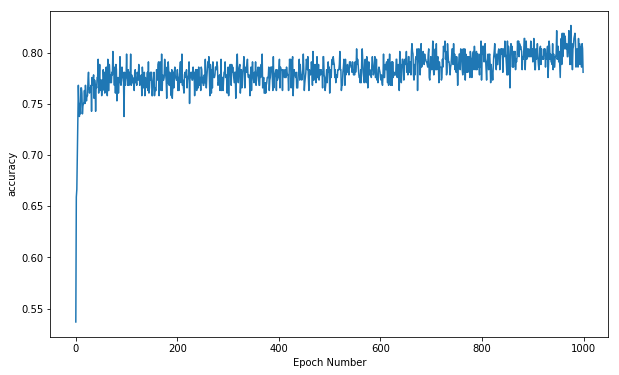

In [13]:
plt.figure(figsize=(10,6))
plt.xlabel('Epoch Number')
plt.ylabel("accuracy")
plt.plot(k.history['acc'])


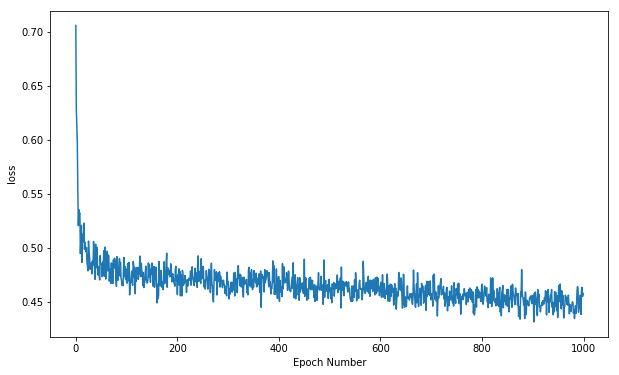

In [14]:
plt.figure(figsize=(10,6))

plt.xlabel('Epoch Number')
plt.ylabel("loss")

plt.plot(k.history['loss'])


In [15]:
deepkk=model.predict_classes(X_test_scaled)
y_comp=y_test.copy()
y_comp["profit_predict"]=deepkk
y_comp

,profit,profit_predict
25,1,1
12,0,0
497,1,1
323,1,1
114,1,0
526,1,1
231,1,1
541,1,1
134,0,0
263,0,1


In [16]:
zz=(y_comp["profit"]==y_comp["profit_predict"]).sum()/len(deepkk)

In [17]:
print(f"accuracy on test dataset is {round(zz*100,2)}%")

accuracy on test dataset is 80.15%


In [18]:
model.predict_classes(X_test_scaled[0].reshape(-1,1).T)

array([1], dtype=int64)

In [19]:
# userinput

data = []
print(X.iloc[:,[0,1,2,3]].columns)
n = 4
for i in range(0, n):
    x = int(input('Enter the value in order: '))
    data.append(x)
# data.append(data[3]/data[2])
# data.append(data[1]/data[2])
data=np.log(data)

Index(['budge', 'comment_count', 'view_count', 'like_count'], dtype='object')
Enter the value in order: 151515
Enter the value in order: 1515
Enter the value in order: 1
Enter the value in order: 1


In [20]:
preview=pd.DataFrame(data).T
preview.columns=X.columns
preview

,budge,comment_count,view_count,like_count
0,11.92844,7.323171,0.0,0.0


In [21]:
#userinput
zzz=model.predict_classes(X_scaler.transform(np.array(data).reshape(-1,1).T))
zzz

array([0], dtype=int64)

In [22]:
if zzz==1:
    print("user input prediction is profitable")
else:
    print("user input prediction is not profitable")

user input prediction is not profitable


In [23]:
model.save("movie_model_trained_log.h5")

In [24]:
from sklearn.externals.joblib import dump, load
dump(X_scaler, 'std_scaler.bin', compress=True)


['std_scaler.bin']

In [25]:
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
sc=load('std_scaler.bin')


In [27]:
rf.feature_importances_

array([0.16420326, 0.22839001, 0.31782083, 0.2895859 ])

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.train.get_or_create_global_step()

In [29]:
model.predict_classes(X_test_scaled[3].reshape(-1,1).T)

array([1], dtype=int64)

In [30]:
model.predict(X_test_scaled[3].reshape(-1,1).T)[0][0]

0.055119343

In [31]:
sas=model.predict_classes(X_test_scaled[3].reshape(-1,1).T)

In [32]:
sasa=model.predict(X_test_scaled[3].reshape(-1,1).T)

In [33]:
sasa[0]

array([0.05511934, 0.94488066], dtype=float32)

In [34]:
1

1